In [82]:
import rm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
locations = ['st albans station',
             'harpenden station',
             'thames ditton station' ,
             'west dulwich station' , 
             'crystal palace station', 
             'norbiton station' ,
             'surbiton station', 
             'sevenoaks station' , 
             'stevenage station' ,
             ]

In [84]:
search_dict = {'locationIdentifier': 'sevenoaks station',
               'minBedrooms' : 3,
               'maxBedrooms' : 3,
               'propertyTypes': 'semi-detached',
               'primaryDisplayPropertyType':'houses',
                # 'propertyTypes': 'detached%2Csemi-detached%2Cterraced',
               'minPrice': 300000,
               'maxPrice': 950000,
               'radius': 1.0,
               'apiApplication': 'IPAD',
                }

## Loop over locations

In [85]:
results = {}
gdf = pd.DataFrame()
for my_loc in locations: 
    search_dict['locationIdentifier'] = my_loc
    my_search = rm.rm(None)
    my_search.clear_df()
    my_search.set_search_details(search_dict)
    my_search.run_search()
    results[my_loc] = my_search.df
    gdf = gdf.append(my_search.df)

In [86]:
gdf['place'] = gdf['searched_location'].str.split(',').str[0].str.replace(' Station','')
gdf['ad'] = gdf.autoEmailReasonType
gdf['prop'] = gdf.propertyType
gdf['loc'] = gdf.place 

In [87]:
gdf.place.unique()

array(['St. Albans', 'Harpenden', 'Thames Ditton', 'West Dulwich',
       'Crystal Palace', 'Norbiton', 'Surbiton', 'Sevenoaks', 'Stevenage'],
      dtype=object)

In [88]:
gdf[gdf.place == 'Thames Ditton'].price.describe()

count        17.000000
mean     664938.235294
std      108629.944550
min      475000.000000
25%      575000.000000
50%      675000.000000
75%      750000.000000
max      825000.000000
Name: price, dtype: float64

In [89]:
gdf[gdf.place == 'St. Albans'].price.describe()

count        72.000000
mean     620554.166667
std      134959.665010
min      400000.000000
25%      530000.000000
50%      575000.000000
75%      710000.000000
max      950000.000000
Name: price, dtype: float64

### Price distributions

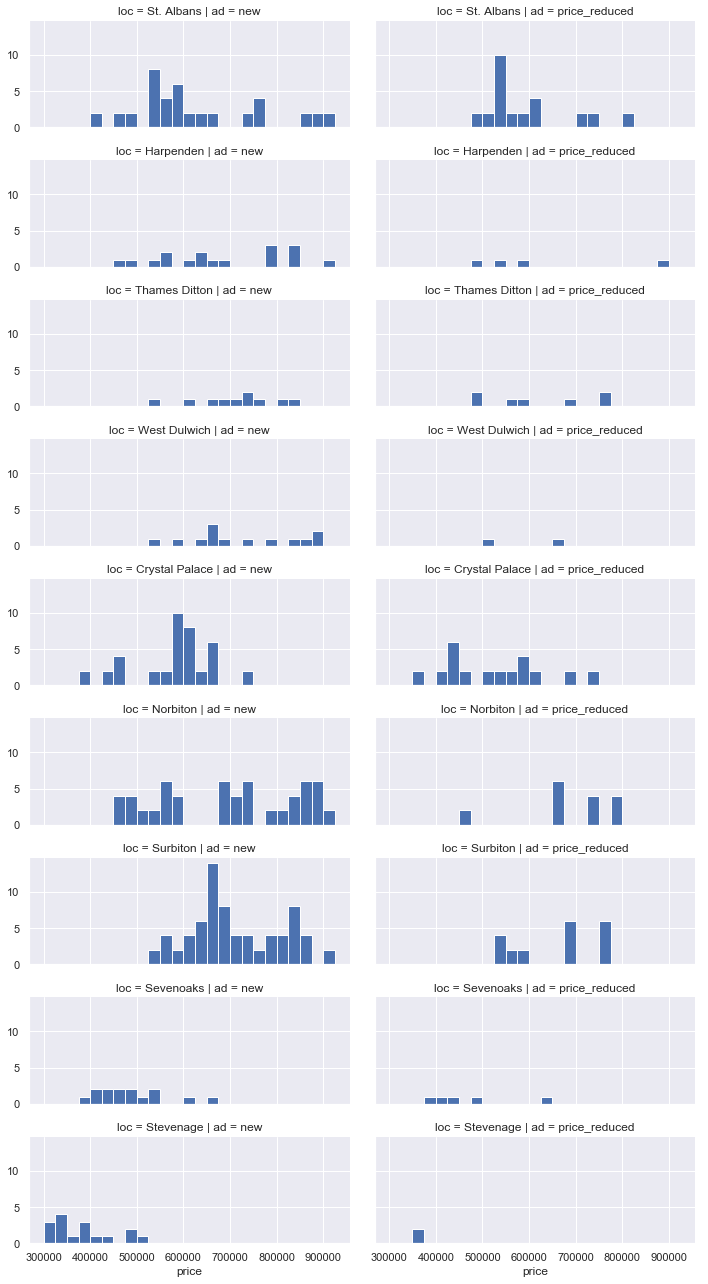

In [90]:
sns.set(font_scale=1)
bins = np.arange(search_dict['minPrice'], search_dict['maxPrice'], 25000)
g = sns.FacetGrid(gdf, row="loc",col = 'ad', height = 2, aspect = 2.5)
g.map(plt.hist, "price", bins = bins);

### Days_Since_Post distributions

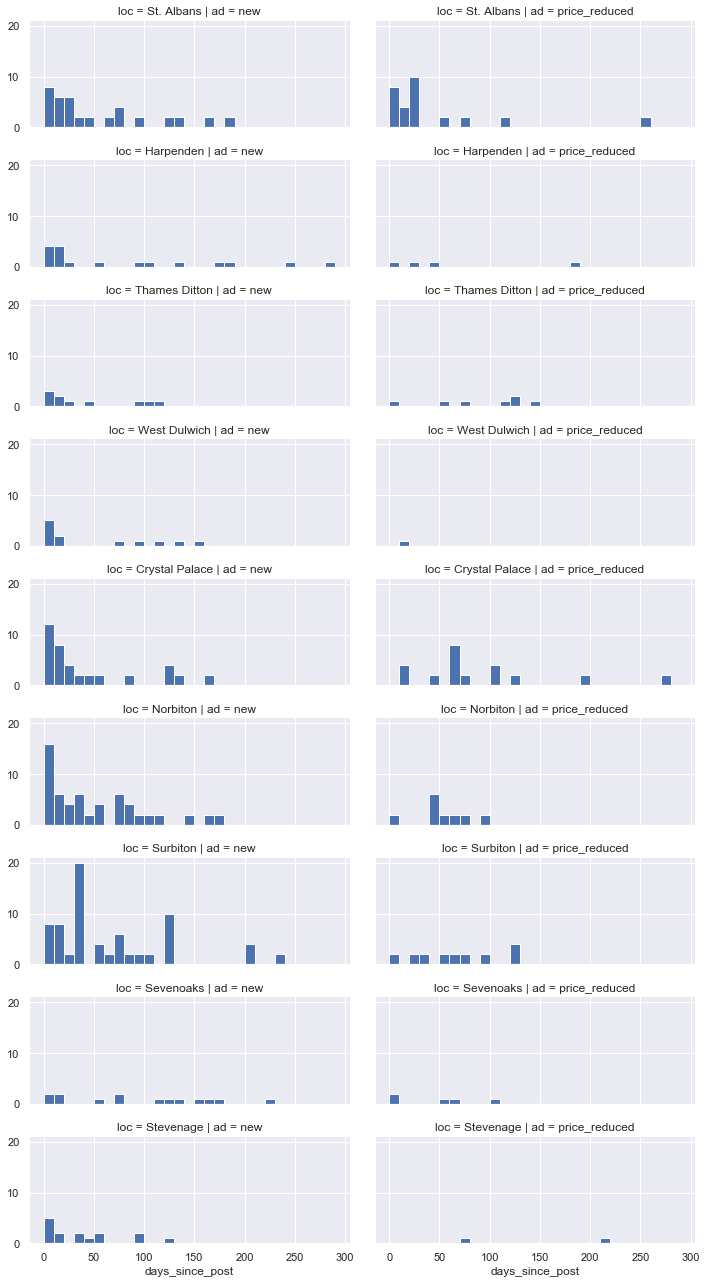

In [91]:
sns.set(font_scale=1)
bins = np.arange(0, 300, 10)
g = sns.FacetGrid(gdf, row="loc",col = 'ad', height = 2, aspect = 2.5)
g.map(plt.hist, "days_since_post", bins = bins);

In [92]:
gdf.propertyType.value_counts()
house_type = ['terraced house', 'semi-detached house','end of terrace house','detached house']

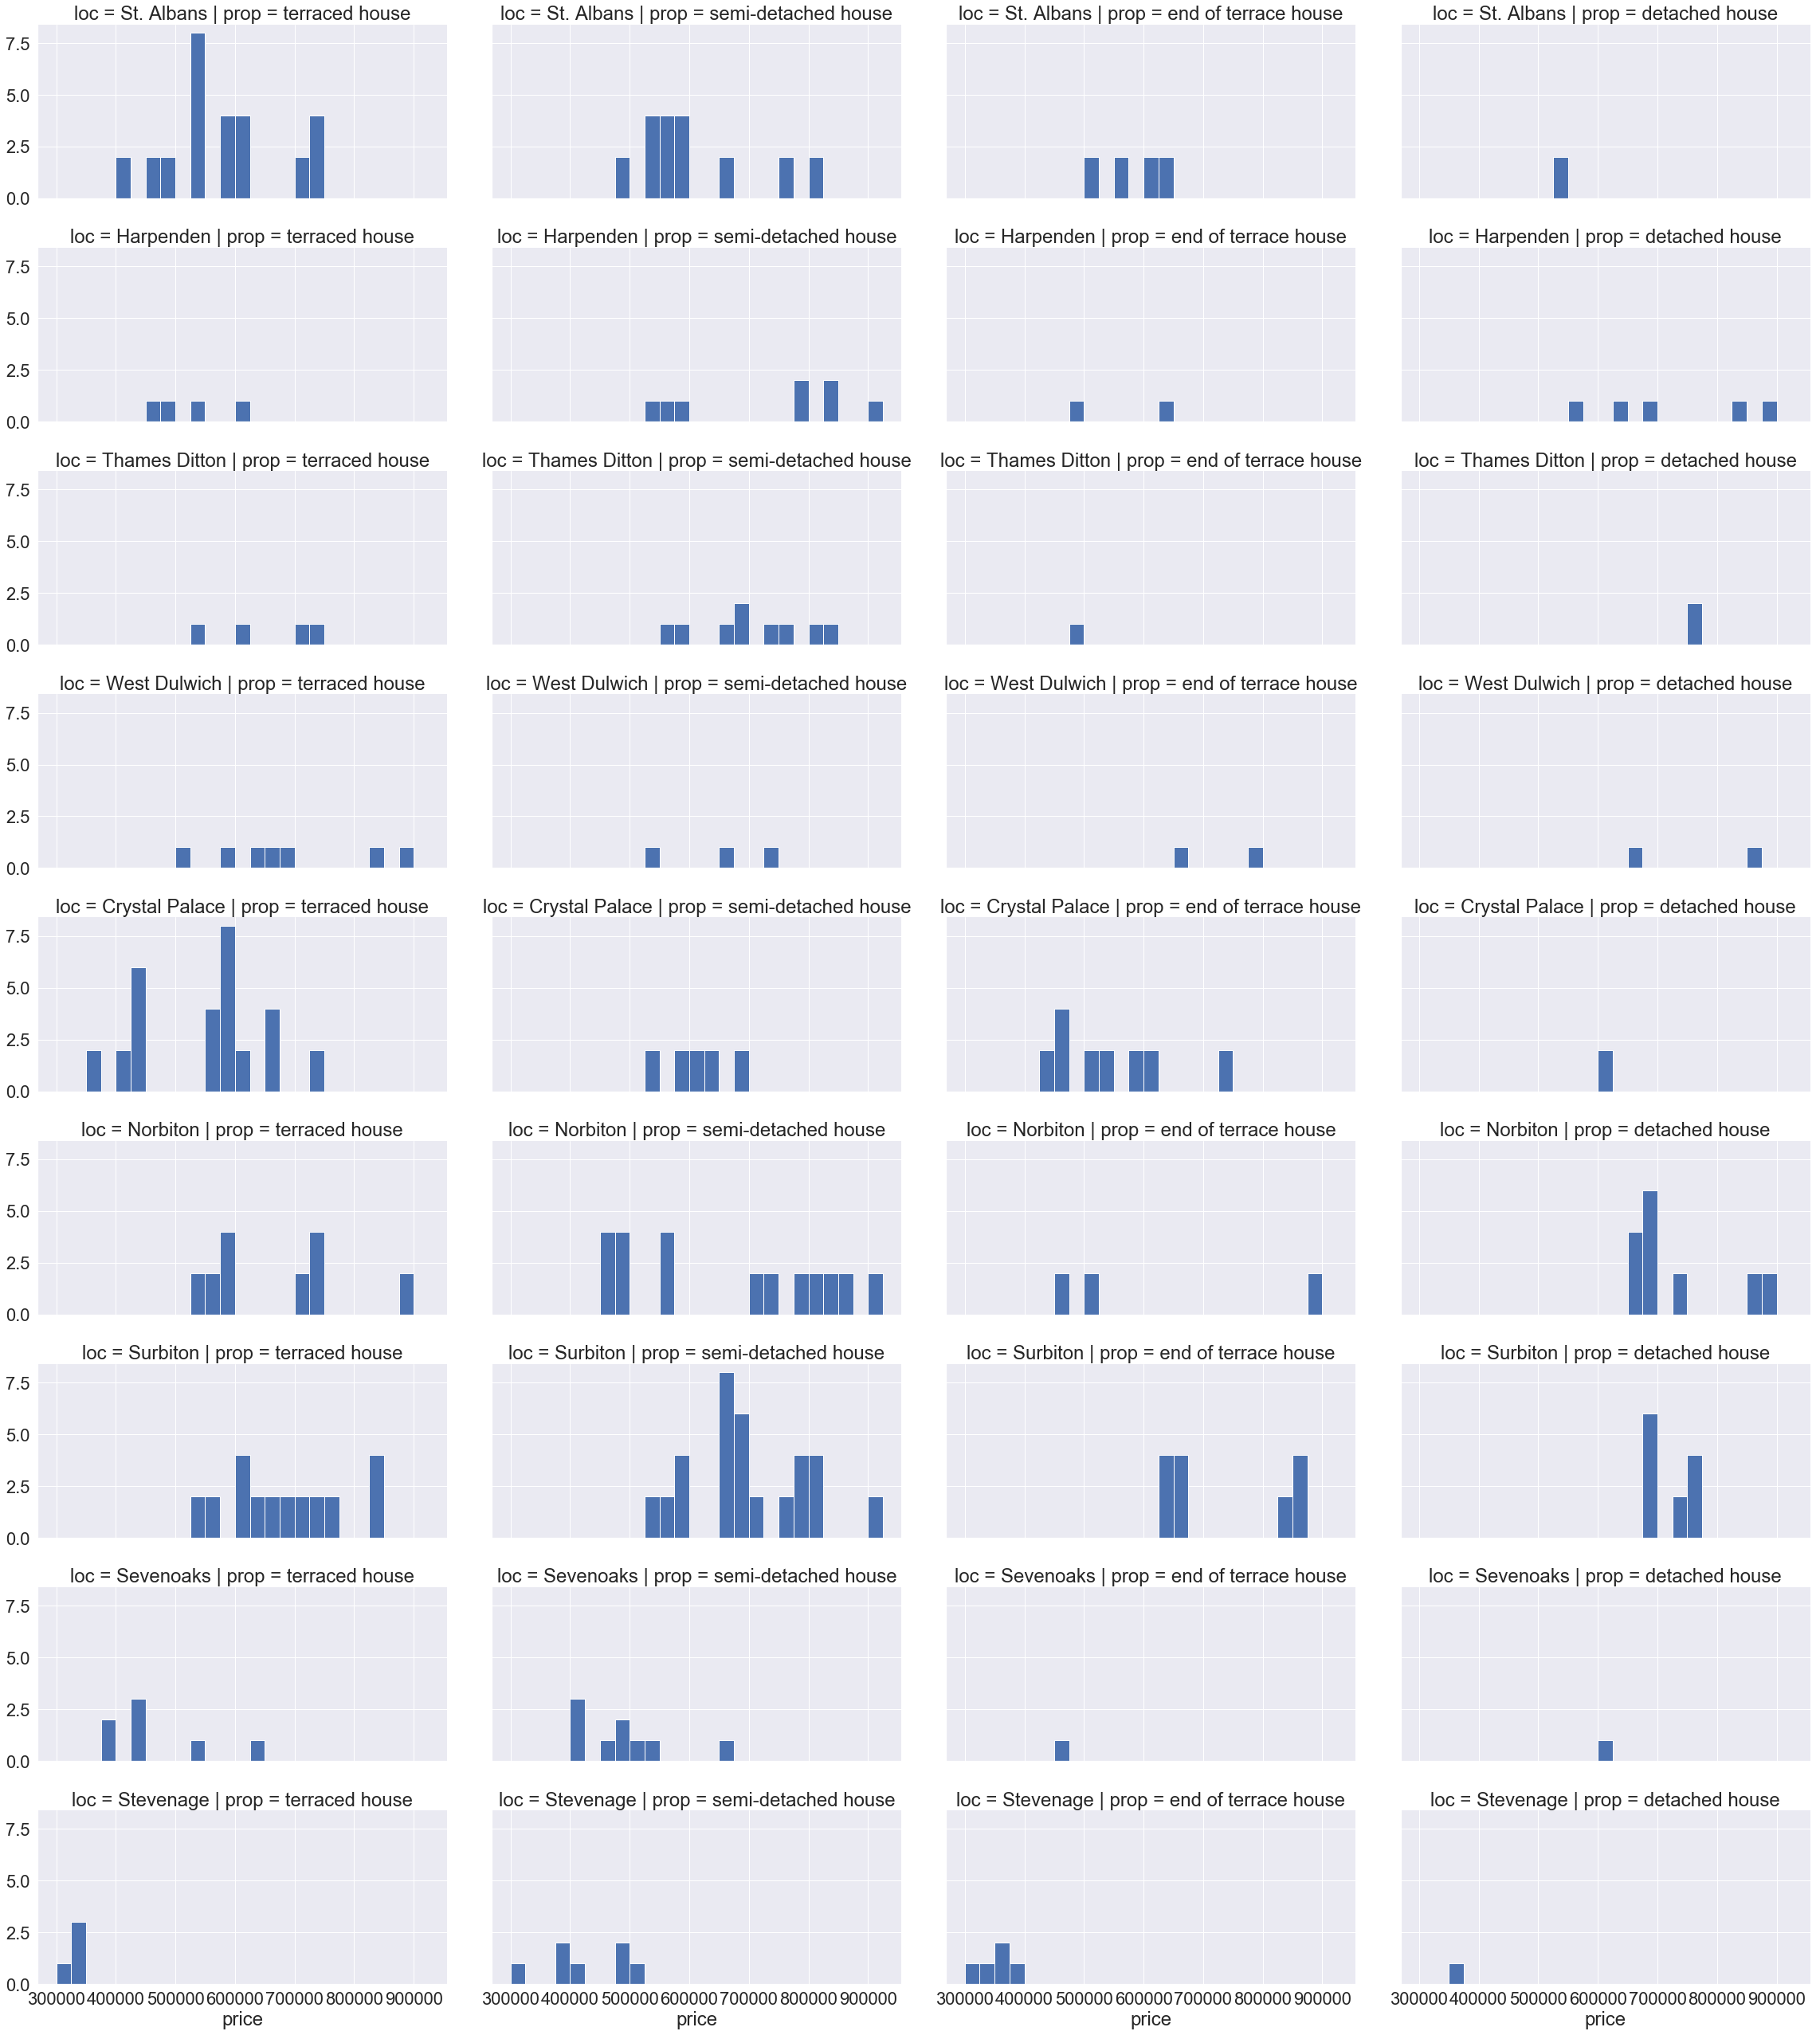

In [93]:
sns.set(font_scale=2)
bins = np.arange(search_dict['minPrice'], search_dict['maxPrice'], 25000)
g = sns.FacetGrid(gdf[gdf.propertyType.isin(house_type)], row="loc",col = 'prop', height = 4, aspect = 2)
g.map(plt.hist, "price", bins = bins);